In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [2]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)

In [3]:
env = gym.make('FrozenLake-v3')

In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [5]:
dis = .99
num_episodes = 2000
rList = []

In [6]:
for i in range(num_episodes):
    state, _ = env.reset()
    rAll = 0
    done = False

    e = 1. / ((i//100) + 1)

    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n) / (i+1))

        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])

        new_state, reward, done, truncated, info = env.step(action)

        Q[state, action] = reward + dis * np.max(Q[new_state,:])

        rAll += reward
        state = new_state

    rList.append(rAll)

/opt/anaconda3/envs/gym/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Success rate: 0.778


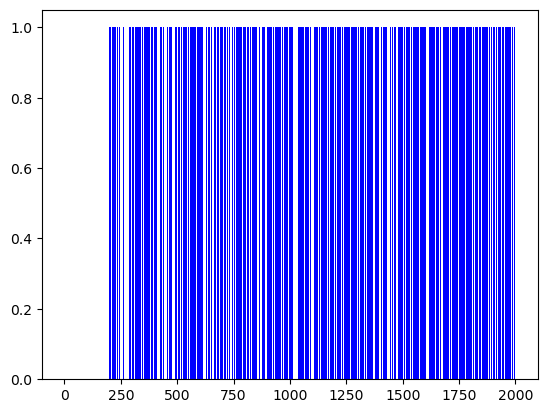

In [7]:
print("Success rate: " + str(sum(rList)/num_episodes))
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [8]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.92274469 0.93206535]
 [0.93206535 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.92274469]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.91351725]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]
